In [3]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline
#pl.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


# Idea: 

## On average, men takes trips that are shorter


# Null Hypothesis:

## The average trip length for males is shorter than the average trip length for females


# Alternative Hypothesis: 

## The average trip length for males is longer than the average trip length for females

# significance level  $\alpha=0.05$


In [4]:
PUIDATA = os.getenv("PUIDATA")
print(PUIDATA)

/home/cusp/ep2247/PUIdata


In [5]:
CUSP = '/gws/open/Student/cikibike'
print(CUSP)

/gws/open/Student/cikibike


In [6]:
url = (CUSP+"/201707-citibike-tripdata.csv.zip")
print(url)
df = pd.read_csv("/gws/open/Student/citibike/201707-citibike-tripdata.csv.zip")
df['startdate'] = pd.to_datetime(df['starttime'])
df['enddate'] = pd.to_datetime(df['stoptime'])
df.head()

/gws/open/Student/cikibike/201707-citibike-tripdata.csv.zip


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,startdate,enddate
0,364,2017-07-01 00:00:00,2017-07-01 00:06:05,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,14744,Subscriber,1986.0,1,2017-07-01 00:00:00,2017-07-01 00:06:05
1,2142,2017-07-01 00:00:03,2017-07-01 00:35:46,293,Lafayette St & E 8 St,40.730207,-73.991026,3425,2 Ave & E 104 St,40.789210,-73.943708,19587,Subscriber,1981.0,1,2017-07-01 00:00:03,2017-07-01 00:35:46
2,328,2017-07-01 00:00:08,2017-07-01 00:05:37,3242,Schermerhorn St & Court St,40.691029,-73.991834,3397,Court St & Nelson St,40.676395,-73.998699,27937,Subscriber,1984.0,2,2017-07-01 00:00:08,2017-07-01 00:05:37
3,2530,2017-07-01 00:00:11,2017-07-01 00:42:22,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,26066,Subscriber,1985.0,1,2017-07-01 00:00:11,2017-07-01 00:42:22
4,2534,2017-07-01 00:00:15,2017-07-01 00:42:29,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,29408,Subscriber,1982.0,2,2017-07-01 00:00:15,2017-07-01 00:42:29


In [7]:
df.dtypes

tripduration                        int64
starttime                          object
stoptime                           object
start station id                    int64
start station name                 object
start station latitude            float64
start station longitude           float64
end station id                      int64
end station name                   object
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                           object
birth year                        float64
gender                              int64
startdate                  datetime64[ns]
enddate                    datetime64[ns]
dtype: object

In [8]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'startdate', u'enddate'],
      dtype='object')

In [9]:
df.drop(['start station id','starttime','stoptime', 'start station name',
         'start station latitude', 'start station longitude', 'end station id',
         'end station name', 'end station latitude', 'birth year', 'end station longitude',
         'bikeid', 'usertype'], axis=1, inplace=True)

In [10]:
df.head()

,tripduration,gender,startdate,enddate
0,364,1,2017-07-01 00:00:00,2017-07-01 00:06:05
1,2142,1,2017-07-01 00:00:03,2017-07-01 00:35:46
2,328,2,2017-07-01 00:00:08,2017-07-01 00:05:37
3,2530,1,2017-07-01 00:00:11,2017-07-01 00:42:22
4,2534,2,2017-07-01 00:00:15,2017-07-01 00:42:29


In [11]:
df['startdate'] = df['startdate'].dt.date

In [12]:
male_df = df[df.gender == 1]

In [13]:
male_df.head()

,tripduration,gender,startdate,enddate
0,364,1,2017-07-01,2017-07-01 00:06:05
1,2142,1,2017-07-01,2017-07-01 00:35:46
3,2530,1,2017-07-01,2017-07-01 00:42:22
6,1496,1,2017-07-01,2017-07-01 00:25:15
8,593,1,2017-07-01,2017-07-01 00:10:20


In [14]:
female_df = df[df.gender == 2]

In [15]:
female_df.head()

,tripduration,gender,startdate,enddate
2,328,2,2017-07-01,2017-07-01 00:05:37
4,2534,2,2017-07-01,2017-07-01 00:42:29
5,545,2,2017-07-01,2017-07-01 00:09:24
7,1495,2,2017-07-01,2017-07-01 00:25:15
11,588,2,2017-07-01,2017-07-01 00:10:59


In [16]:
female_trip =female_df['tripduration'].mean() / 60
female_trip

16.956201545554972

In [17]:
female_df = female_df.groupby('startdate').mean()

In [18]:
female_df.head()

,tripduration,gender
startdate,,
2017-07-01,1306.929972,2.0
2017-07-02,1446.034678,2.0
2017-07-03,1147.789399,2.0
2017-07-04,1198.500924,2.0
2017-07-05,1137.216123,2.0


In [19]:
female_df.drop(['gender'], axis=1, inplace=True)

In [20]:
female_df.head()

,tripduration
startdate,
2017-07-01,1306.929972
2017-07-02,1446.034678
2017-07-03,1147.789399
2017-07-04,1198.500924
2017-07-05,1137.216123


In [32]:
male_trip =male_df['tripduration'].mean() / 60
male_trip

15.356587118861654

In [34]:
male_df.drop(['gender'], axis=1, inplace=True)

In [35]:
male_df.head()

,tripduration
startdate,
2017-07-01,1086.676069
2017-07-02,1208.469897
2017-07-03,1096.562484
2017-07-04,1342.855556
2017-07-05,938.124720


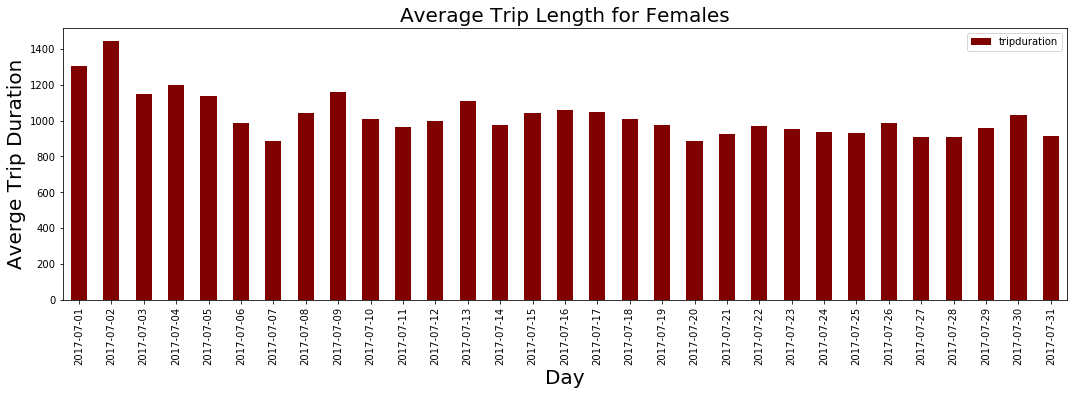

In [54]:
#plot female

ax1 = female_df.plot(kind = "bar", figsize=(18,5), color = 'Maroon')
ax1.set_ylabel("Averge Trip Duration", fontsize="20")
ax1.set_xlabel("Day", fontsize="20")
ax1.set_title('Average Trip Length for Females', fontsize=20)

## Figure 1: Daily Average Trip Length for Females

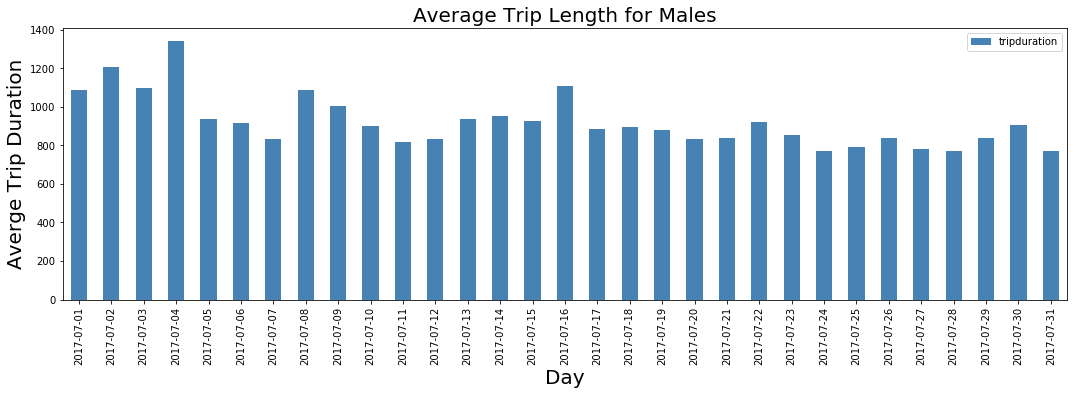

In [55]:
#plot male

ax2 = male_df.plot(kind = "bar", figsize=(18,5), color = 'SteelBlue')
ax2.set_ylabel("Averge Trip Duration", fontsize="20")
ax2.set_xlabel("Day", fontsize="20")
ax2.set_title('Average Trip Length for Males', fontsize=20)

## Figure 2: Daily average trip length for Males